In [1]:
import sys

sys.path.append("..")  # this is so we can import ethicml from the parent directory
import ethicml as em

In [2]:
results_adult = await em.evaluate_models_async(
    datasets=[
        em.adult(),
        em.adult("Race-Binary"),
    ],
    inprocess_models=[
        em.LR(),
        em.SVMAsync(),
        em.Majority(),
        em.Kamiran(),
        em.Kamiran(classifier="SVM"),
    ],
    preprocess_models=[
        em.Calders(preferable_class=1, disadvantaged_group=0),
        em.Upsampler(),
        em.Upsampler("preferential"),
        em.Upsampler("naive"),
    ],
    metrics=[
        em.Accuracy(),
        em.AbsCV(),
        em.F1(),
        em.ProbPos(),
        em.TPR(),
        em.TNR(),
        em.BalancedAccuracy(),
    ],
    per_sens_metrics=[em.Accuracy(), em.ProbPos(), em.TPR(), em.TNR()],
    repeats=10,
    delete_prev=False,
    splitter=em.BalancedTestSplit(),
    topic="kamiran_calders_variants",
    fair_pipeline=False,
    max_parallel=5,
)

synchronous algorithms...


100%|██████████| 80/80 [42:02<00:00, 31.53s/it, model=Kamiran & Calders SVM, dataset=Adult Race-Binary - Train (9)]

asynchronous algorithms...



100%|██████████| 20/20 [11:17<00:00, 33.85s/it, model=SVM, dataset=Adult Race-Binary - Train (9), worker_id=0]


synchronous algorithms...


100%|██████████| 80/80 [01:16<00:00,  1.05it/s, model=Upsample naive, dataset=Adult Race-Binary - Train (9)]

asynchronous algorithms...
synchronous algorithms...



100%|██████████| 160/160 [00:32<00:00,  4.96it/s, model=Majority, dataset=Adult Race-Binary - Train (9)]

asynchronous algorithms...



 45%|████▌     | 36/80 [19:52<24:17, 33.13s/it, model=SVM, dataset=Adult Sex - Train (0), worker_id=1]        

CancelledError: 

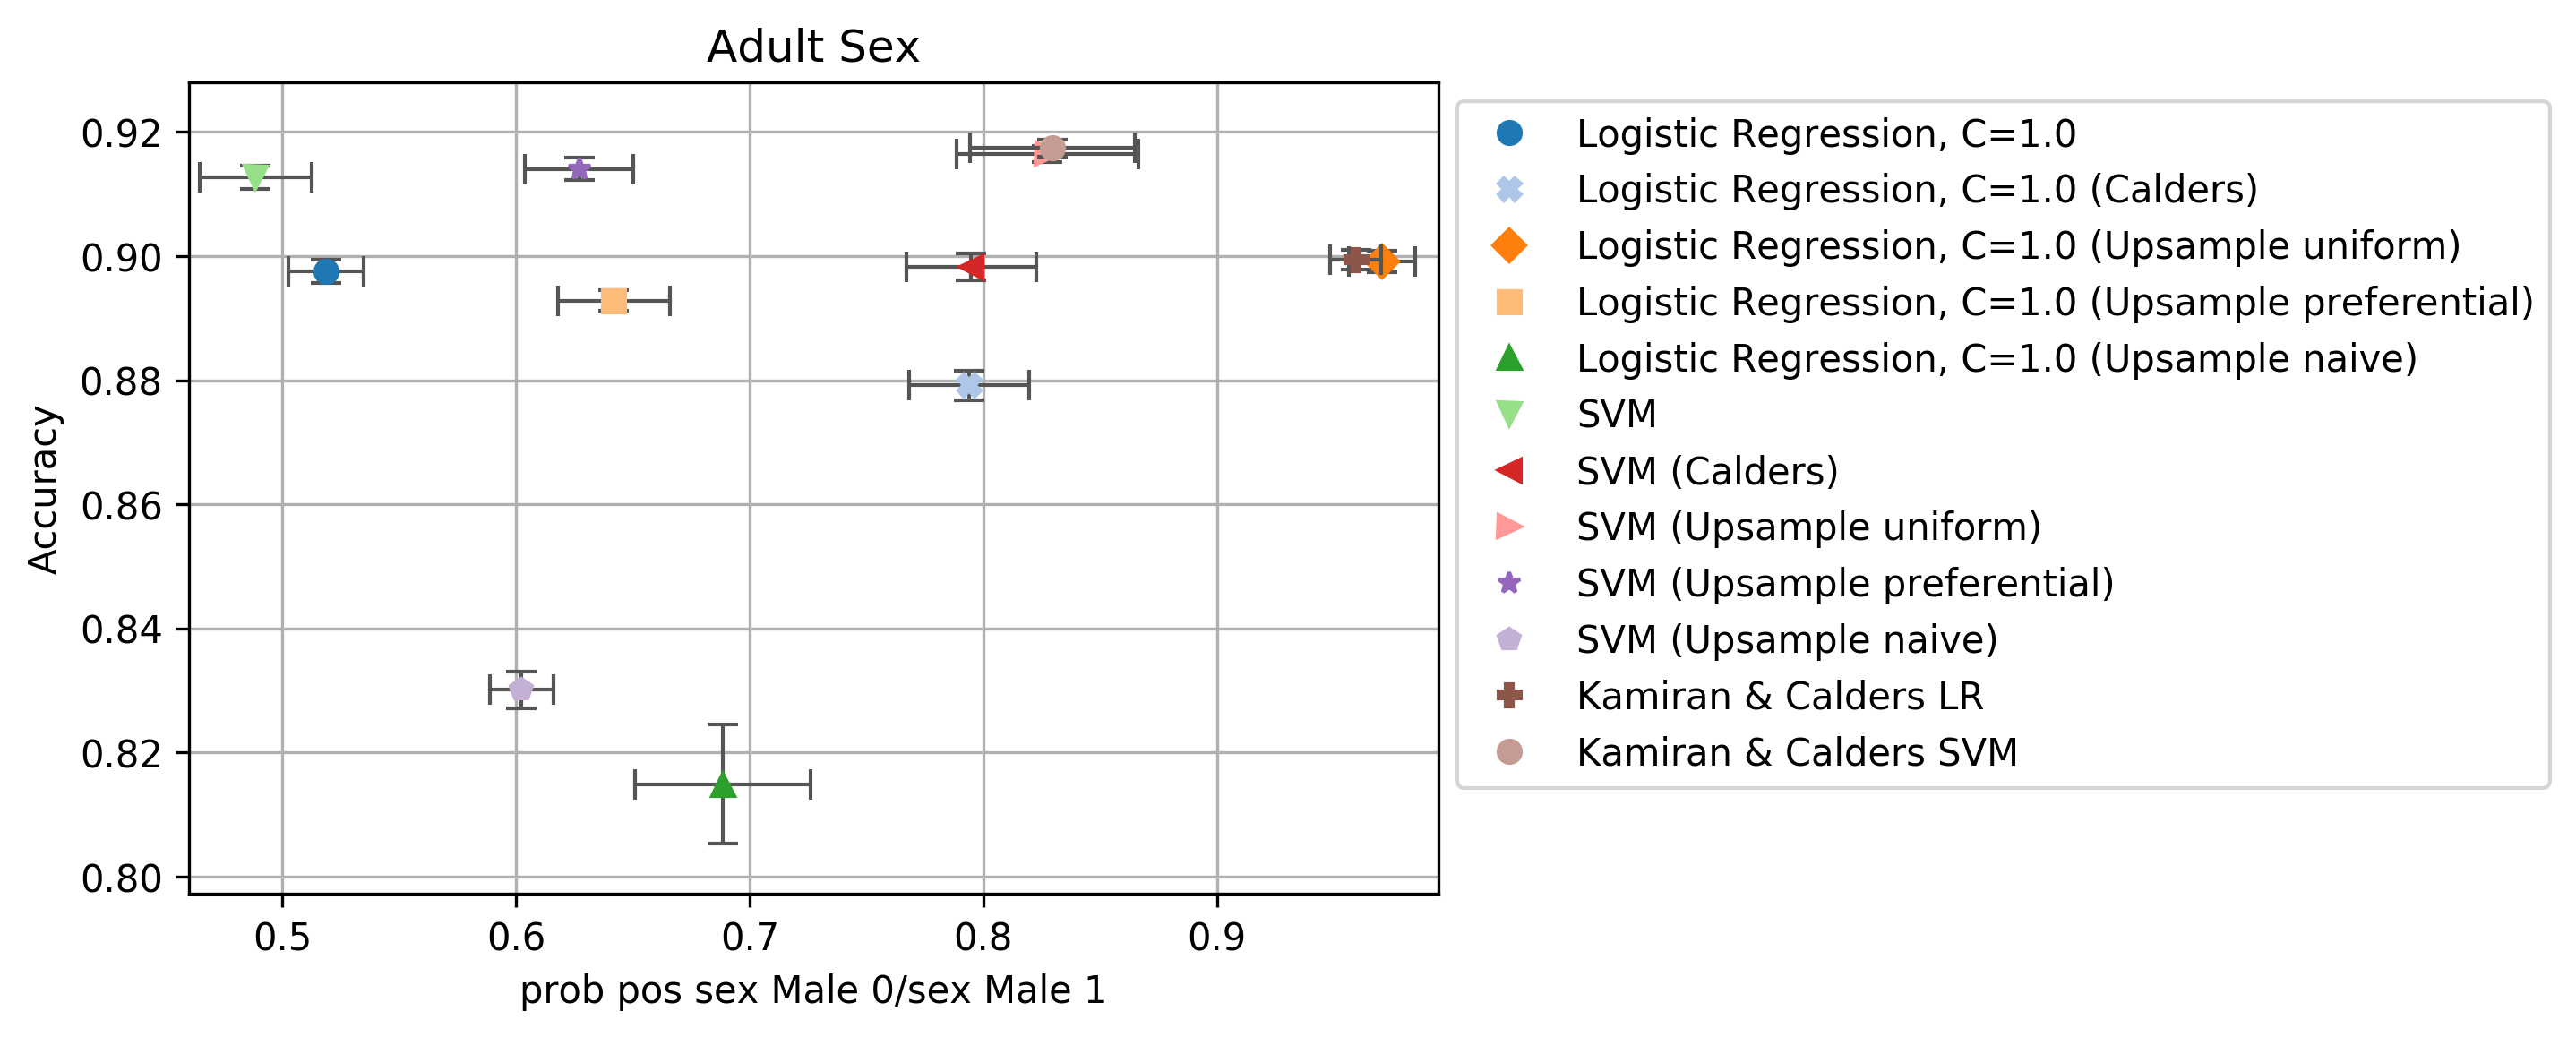

In [5]:
((fig1, _),) = em.plot_results(
    results_adult,
    "Accuracy",
    "prob_pos_sex_Male_0/sex_Male_1",
    transforms_separately=False,
    ptype="cross",
)
fig1

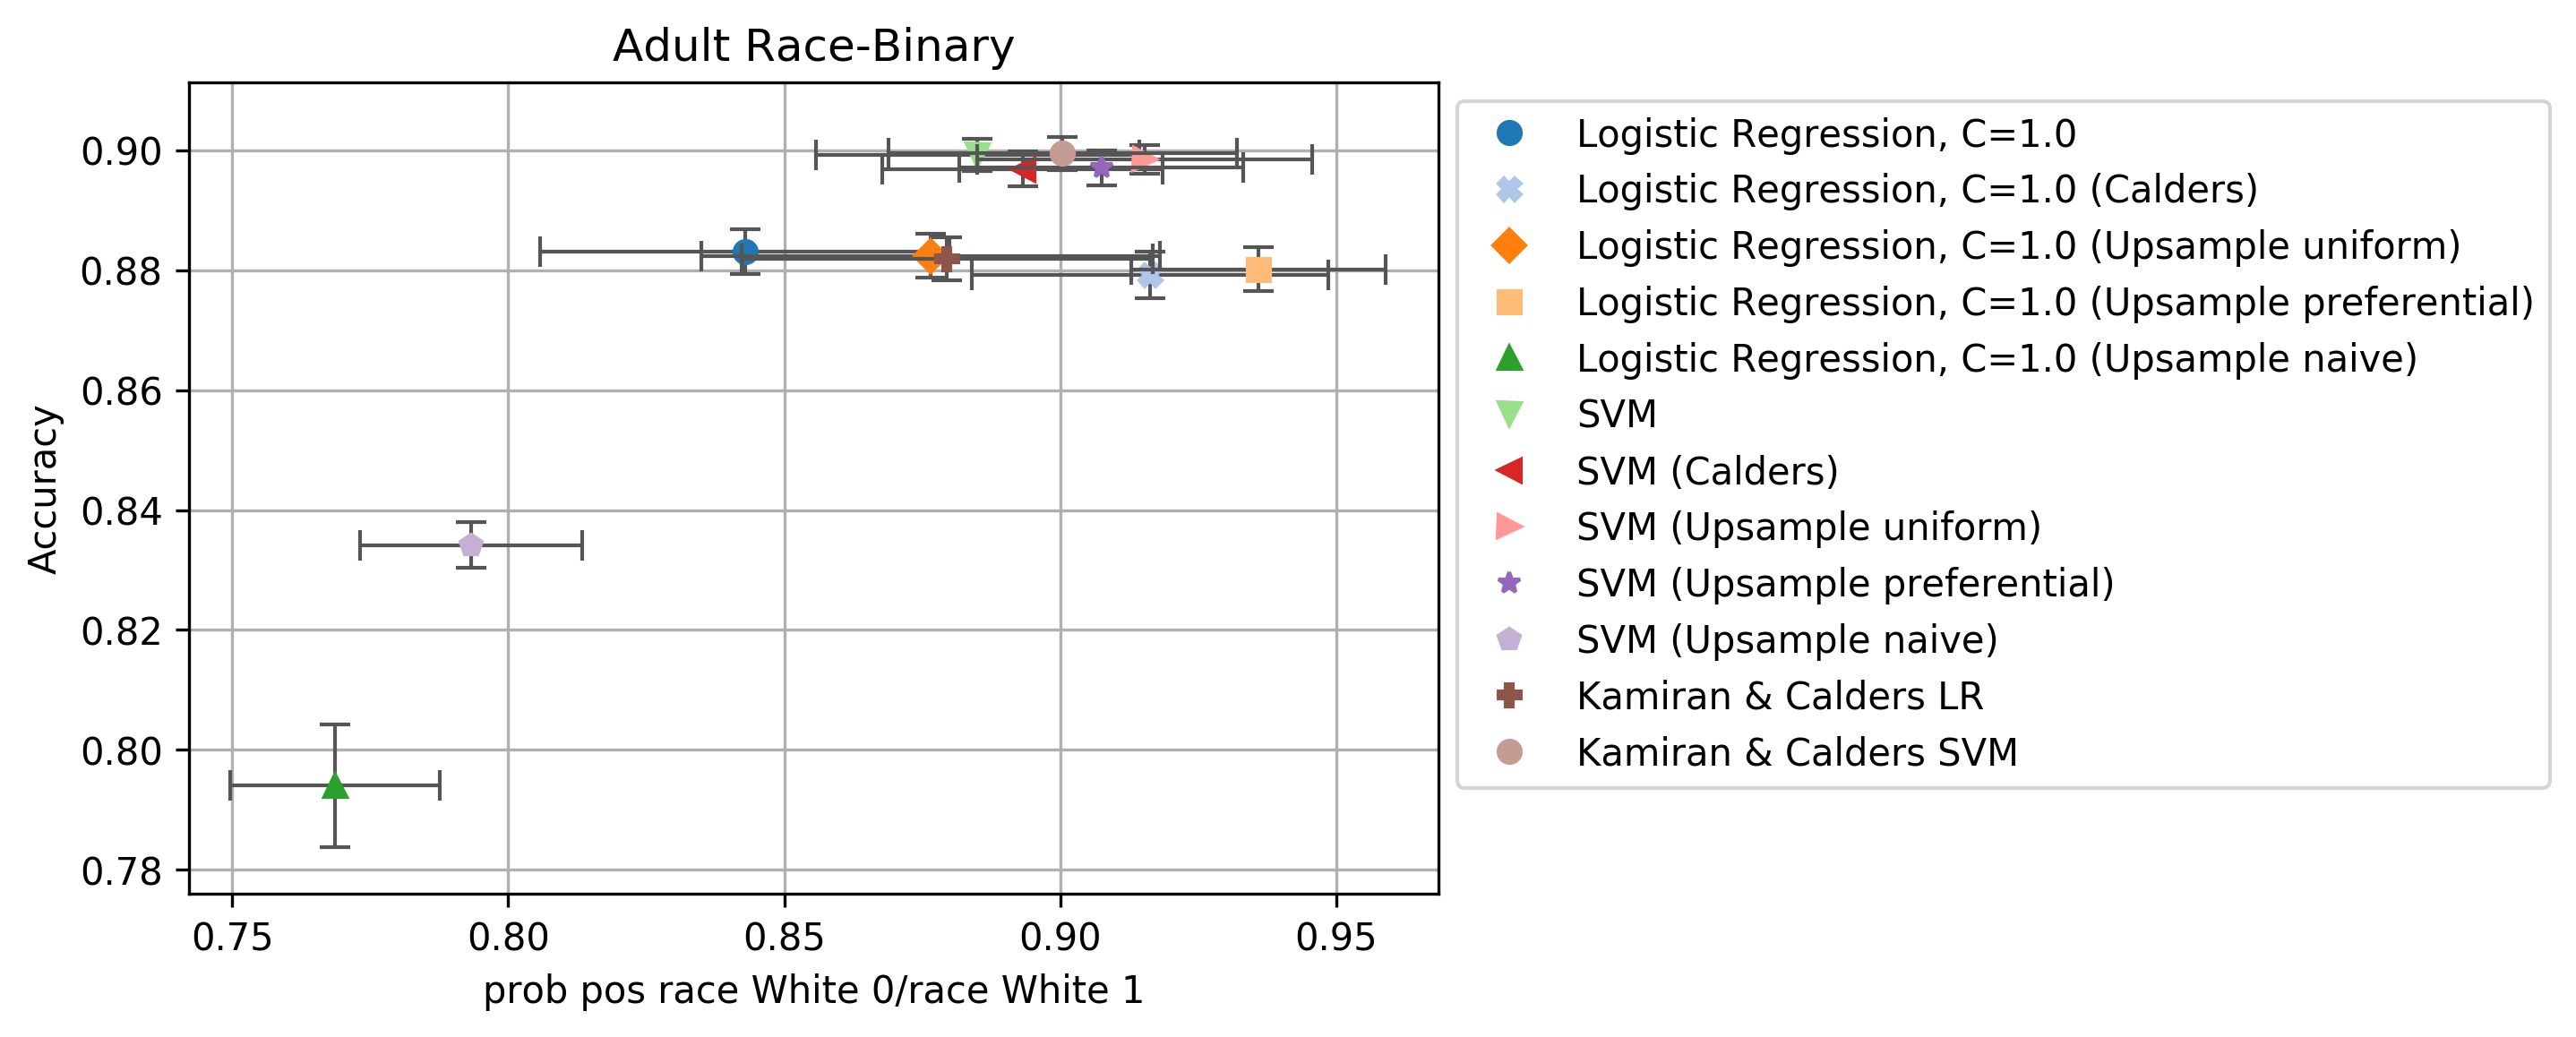

In [7]:
((fig2, _),) = em.plot_results(
    results_adult,
    "Accuracy",
    "prob_pos_race_White_0/race_White_1",
    transforms_separately=False,
    ptype="cross",
)
fig2

In [11]:
results_compas_balancedtest = await em.evaluate_models_async(
    datasets=[
        em.compas("Sex"),
        em.compas("Race"),
    ],
    inprocess_models=[
        em.LR(),
        em.SVMAsync(),
        em.Majority(),
        em.Kamiran(),
        em.Kamiran(classifier="SVM"),
    ],
    preprocess_models=[
        em.Calders(preferable_class=1, disadvantaged_group=0),
        em.Upsampler(),
        em.Upsampler("preferential"),
        em.Upsampler("naive"),
    ],
    metrics=[
        em.Accuracy(),
        em.AbsCV(),
        em.F1(),
        em.ProbPos(),
        em.TPR(),
        em.TNR(),
        em.BalancedAccuracy(),
    ],
    per_sens_metrics=[em.Accuracy(), em.ProbPos(), em.TPR(), em.TNR()],
    repeats=0,
    delete_prev=False,
    splitter=em.BalancedTestSplit(balance_type="P(y|s)=0.5"),
    topic="kamiran_calders_variants",
    fair_pipeline=False,
    max_parallel=5,
)

0it [00:00, ?it/s]


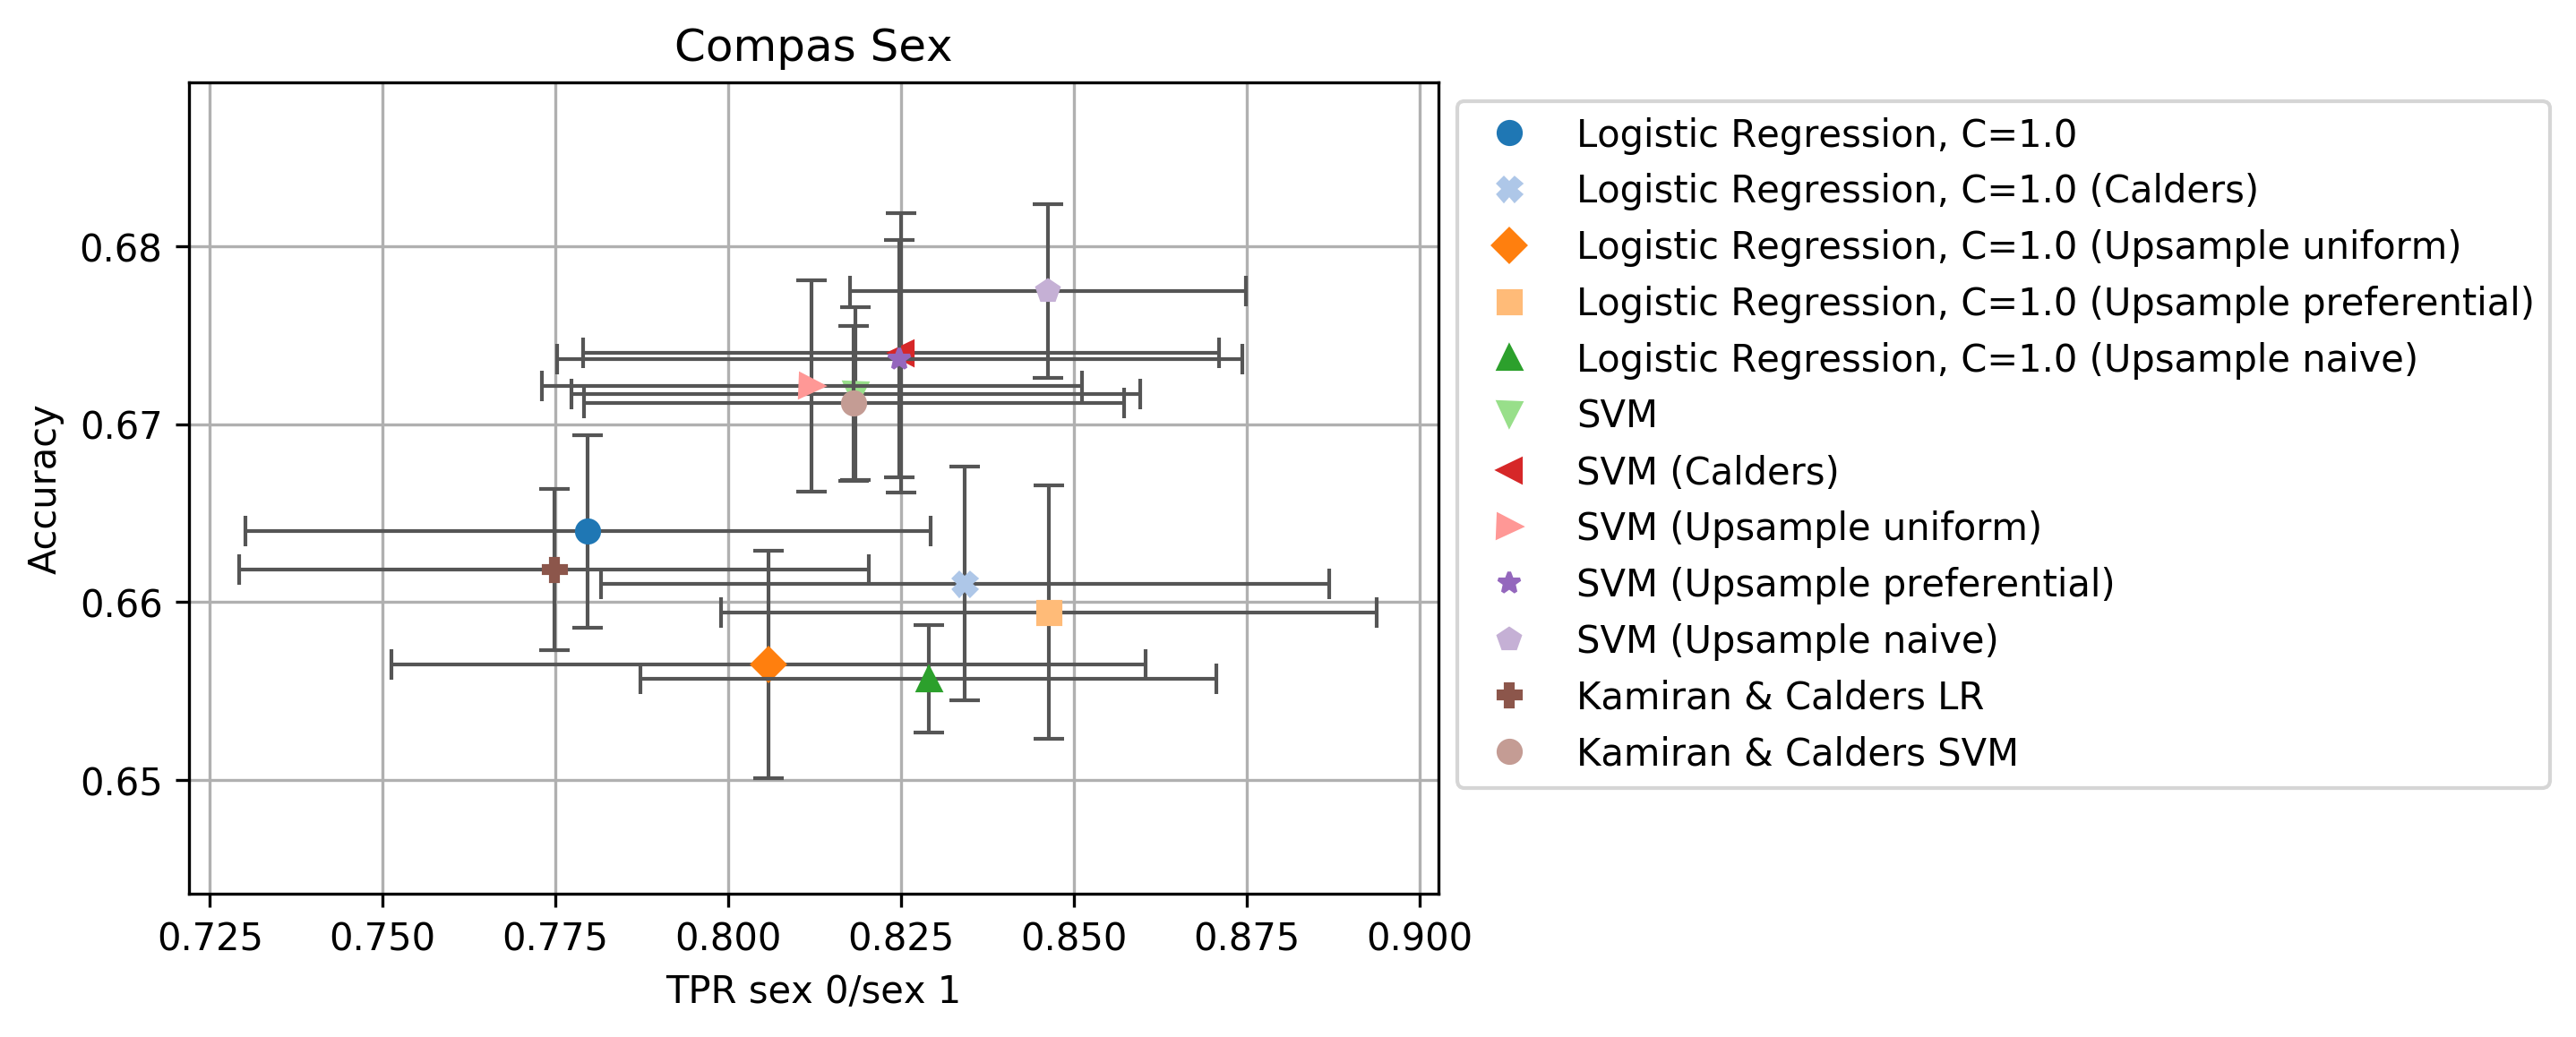

In [12]:
((fig3, _),) = em.plot_results(
    results_compas_balancedtest,
    "Accuracy",
    "TPR_sex_0/sex_1",
    transforms_separately=False,
    ptype="cross",
)
fig3

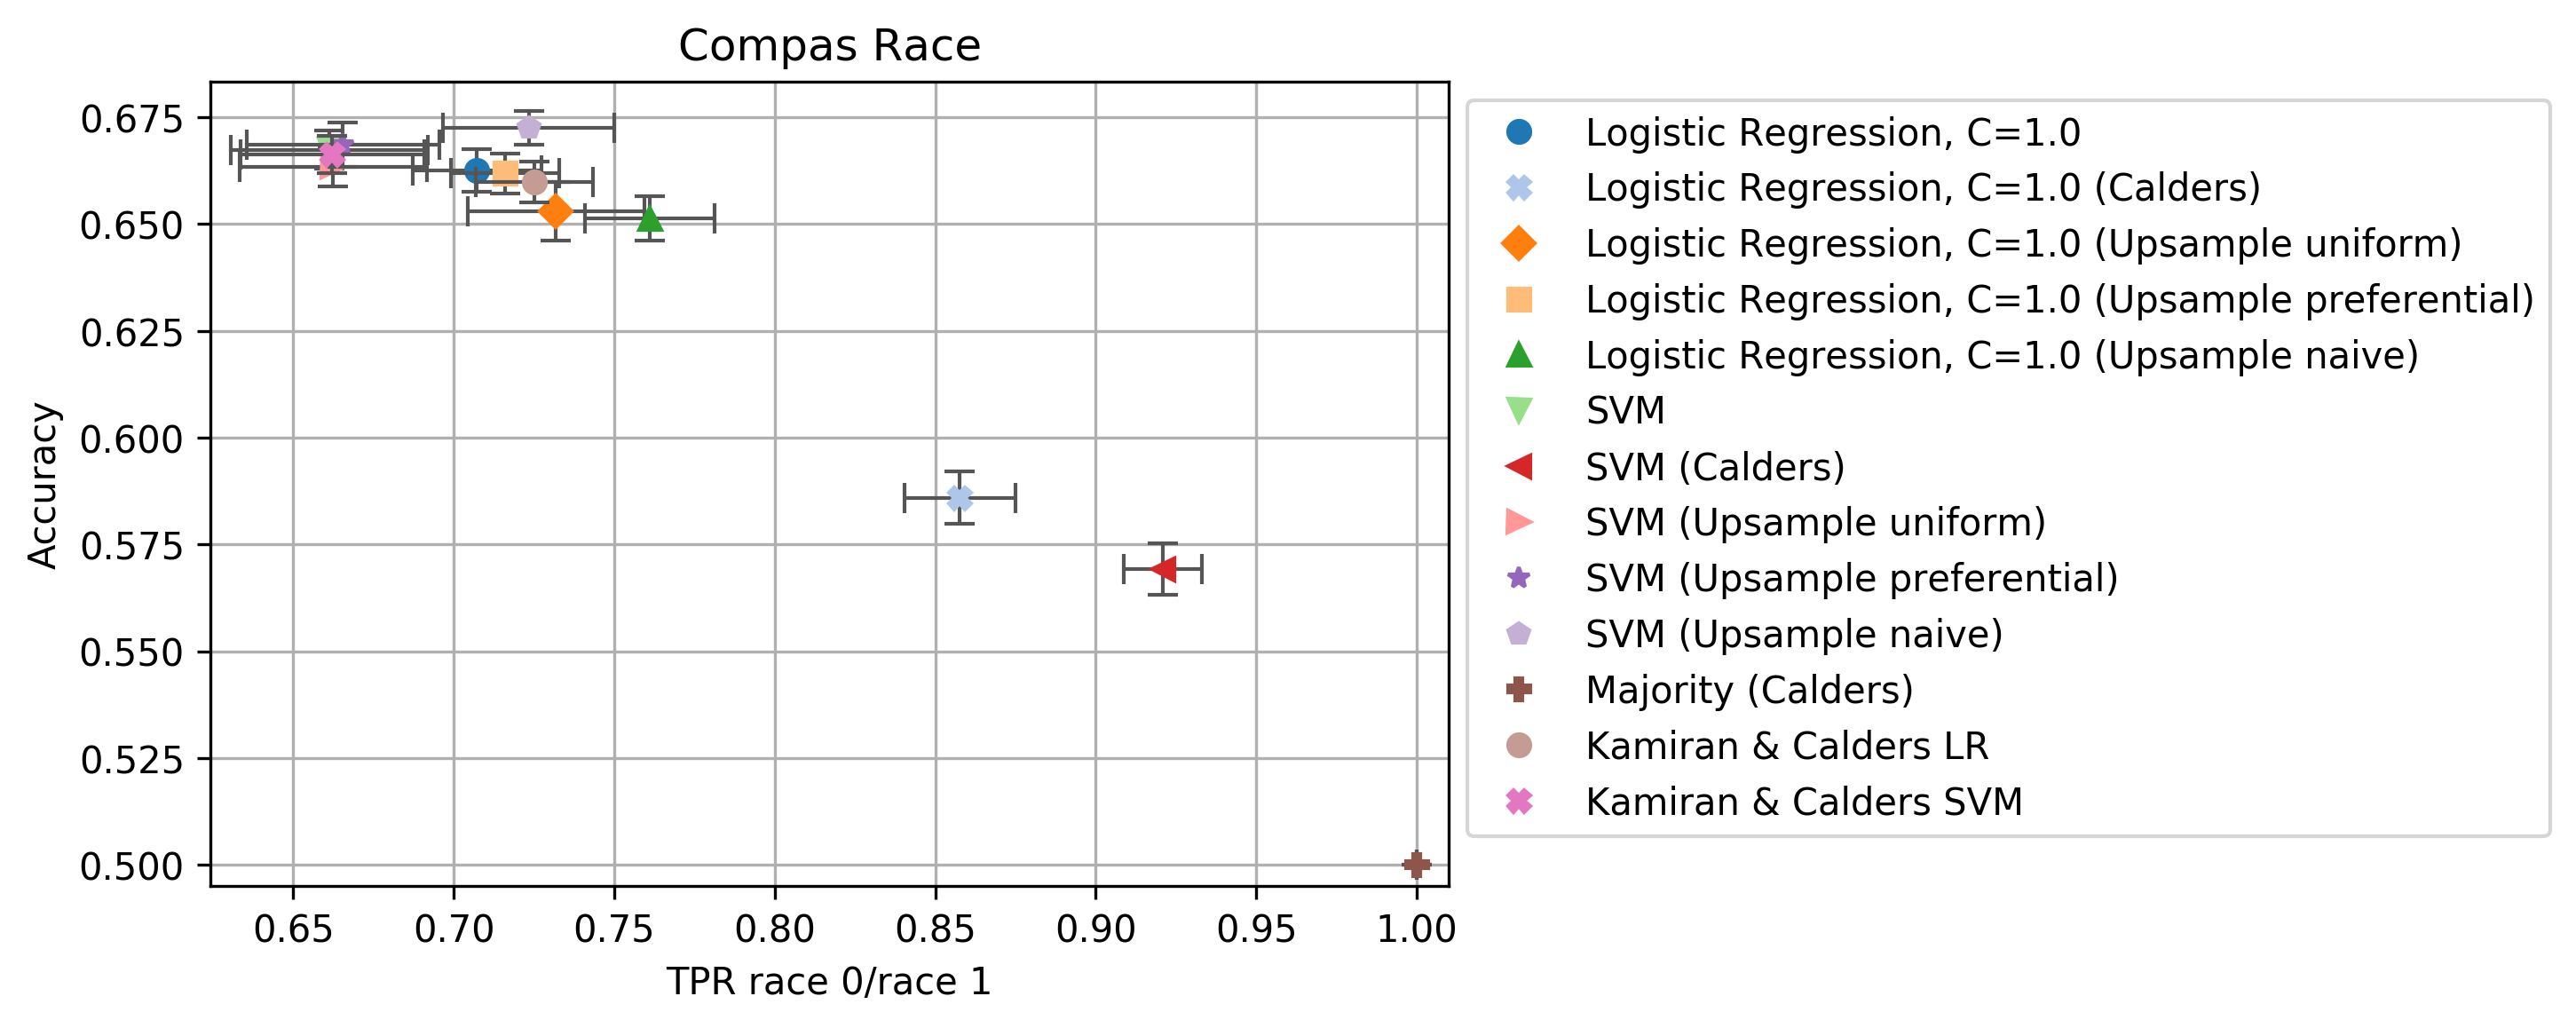

In [13]:
((fig4, _),) = em.plot_results(
    results_compas_balancedtest,
    "Accuracy",
    "TPR_race_0/race_1",
    transforms_separately=False,
    ptype="cross",
)
fig4

In [5]:
results = await em.evaluate_models_async(
    datasets=[
        em.compas("Sex"),
        em.compas("Race"),
    ],
    inprocess_models=[
        em.LR(),
        em.SVMAsync(),
        em.Majority(),
        em.Kamiran(),
        em.Kamiran(classifier="SVM"),
    ],
    preprocess_models=[
        em.Calders(preferable_class=1, disadvantaged_group=0),
        em.Upsampler(),
        em.Upsampler("preferential"),
        em.Upsampler("naive"),
    ],
    metrics=[
        em.Accuracy(),
        em.AbsCV(),
        em.F1(),
        em.ProbPos(),
        em.TPR(),
        em.TNR(),
        em.BalancedAccuracy(),
    ],
    per_sens_metrics=[em.Accuracy(), em.ProbPos(), em.TPR(), em.TNR()],
    repeats=10,
    delete_prev=False,
    splitter=em.ProportionalSplit(),
    topic="kamiran_calders_variants_proportional",
    fair_pipeline=False,
    max_parallel=5,
)

100%|██████████| 580/580 [28:10<00:00,  2.91s/it, model=Majority, dataset=Compas Race, transform=Upsample naive, repeat=9]


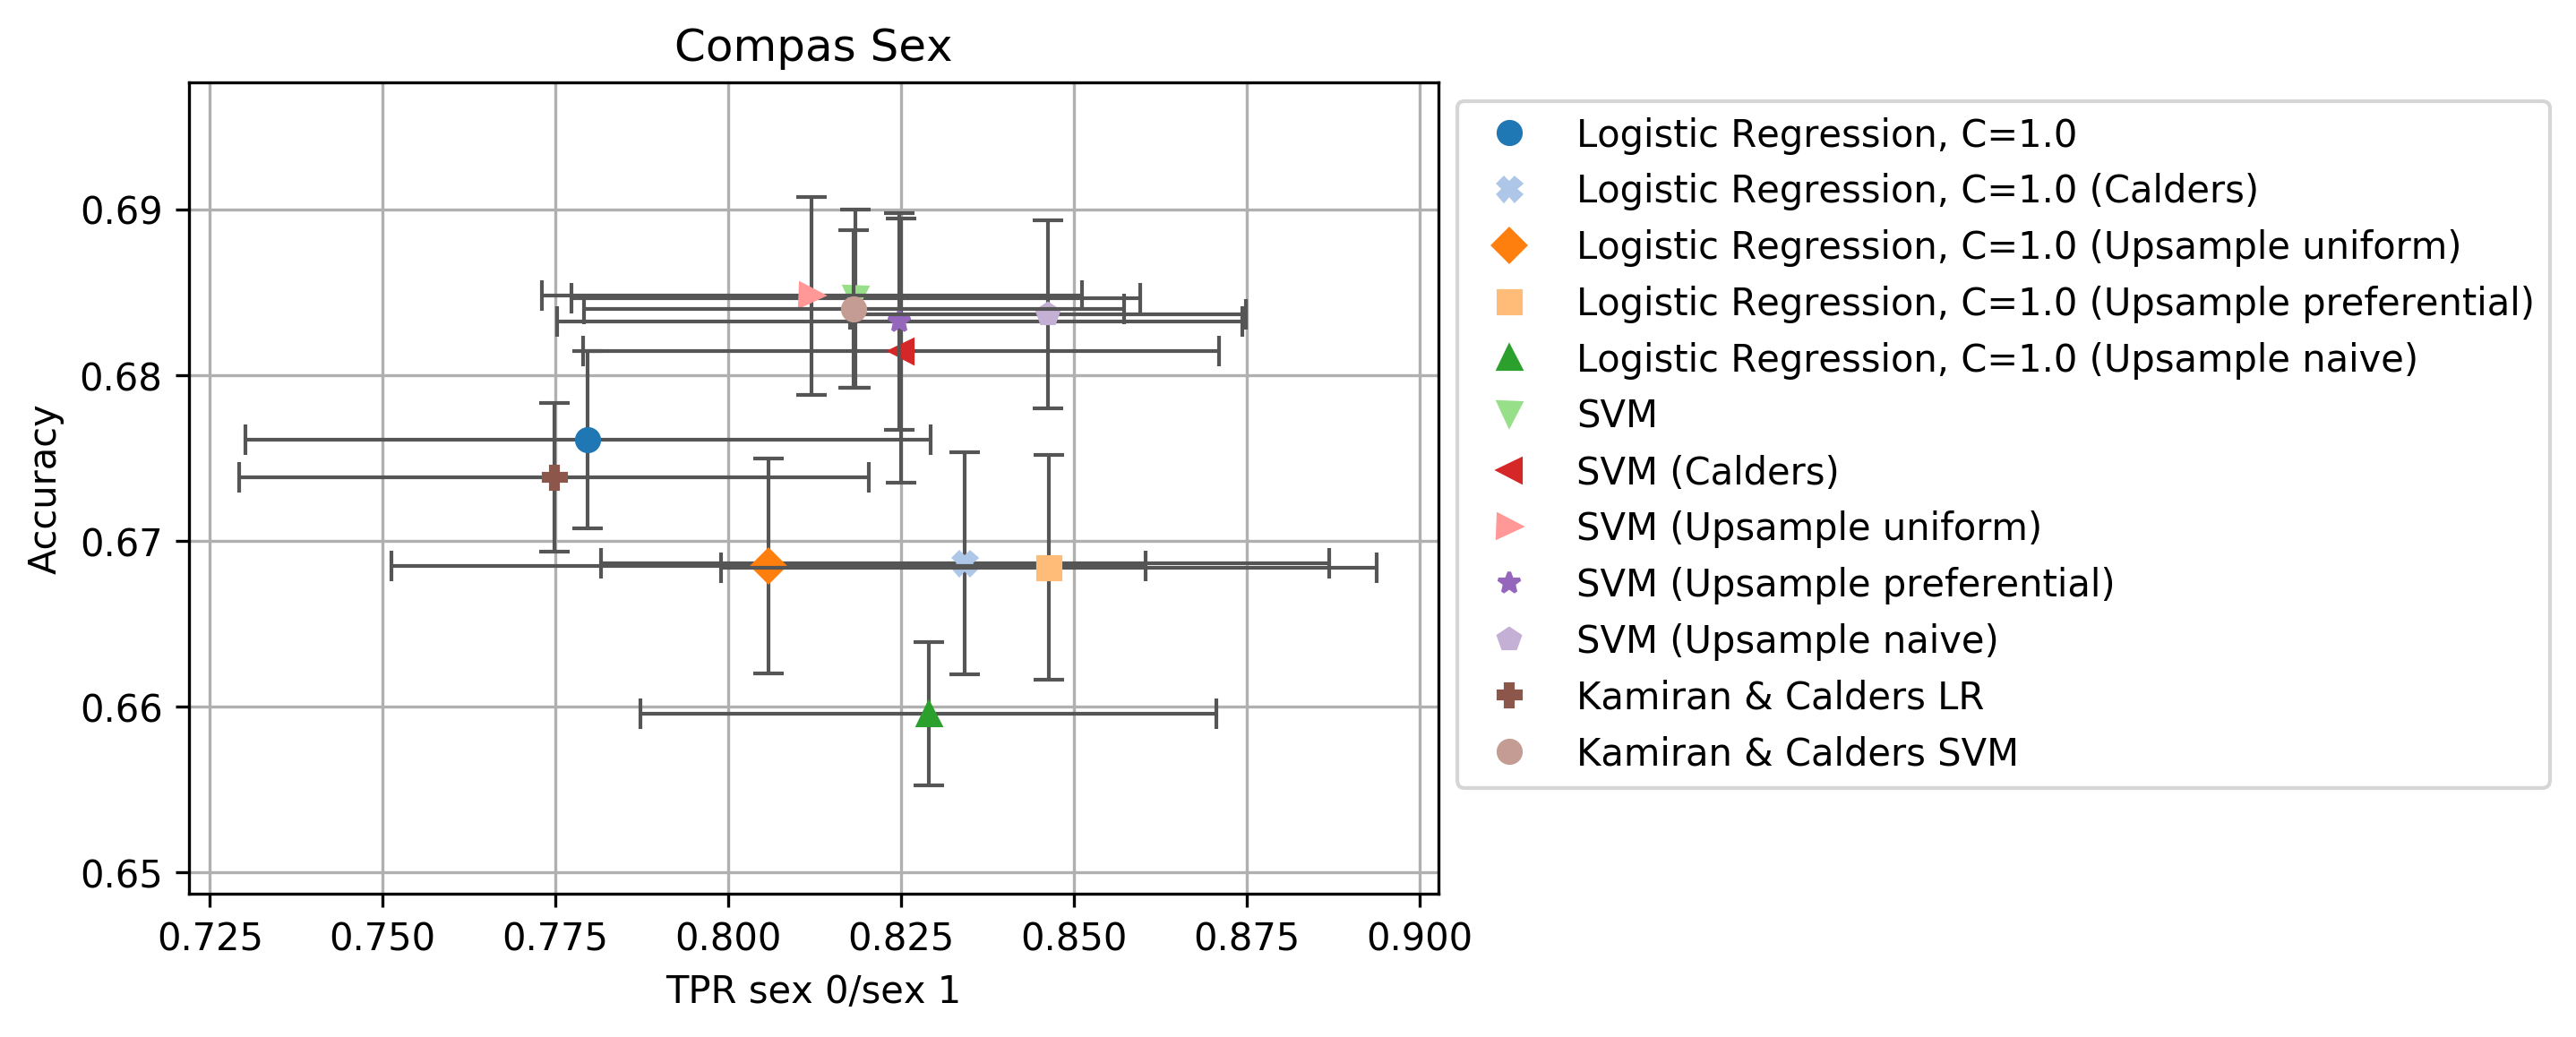

In [14]:
((fig5, _),) = em.plot_results(
    results, "Accuracy", "TPR_sex_0/sex_1", transforms_separately=False, ptype="cross"
)
fig5

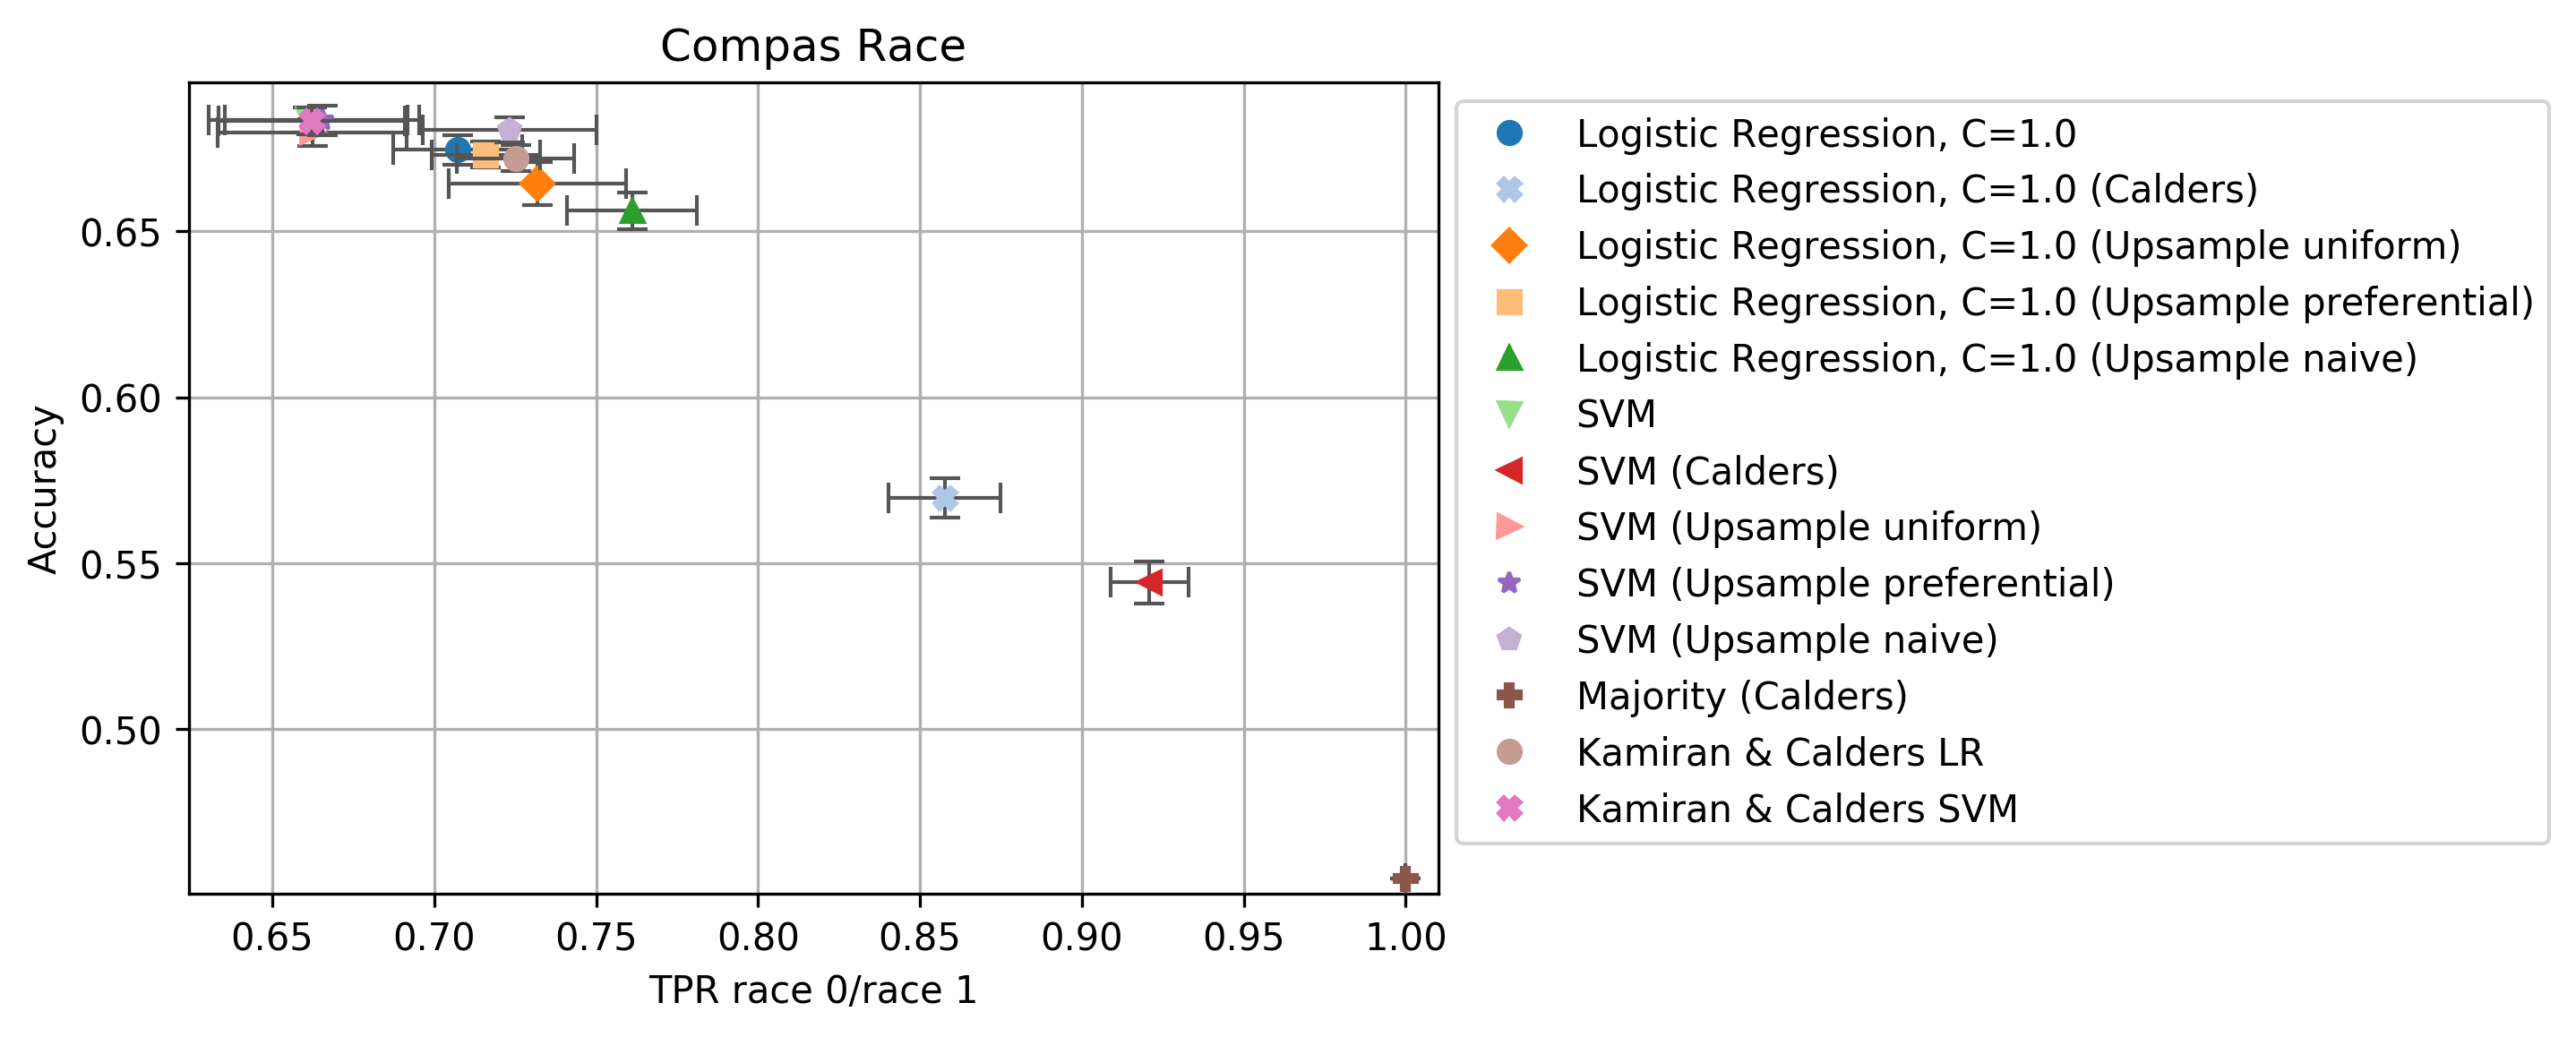

In [15]:
((fig6, _),) = em.plot_results(
    results, "Accuracy", "TPR_race_0/race_1", transforms_separately=False, ptype="cross"
)
fig6